In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 

In [166]:
fd = pd.read_csv("kc_house_data.csv")
fd

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [167]:
fd.isnull().sum().sum()

0

In [168]:
fd.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:ylabel='Frequency'>

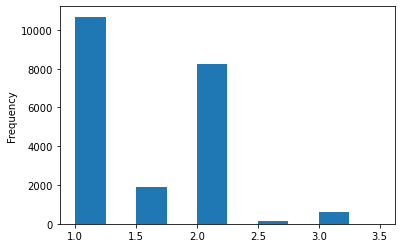

In [169]:
fd['floors'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

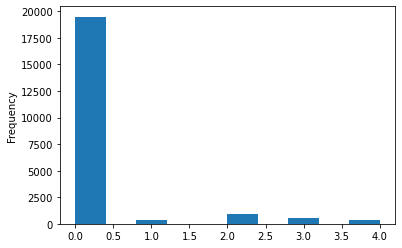

In [170]:
fd['view'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

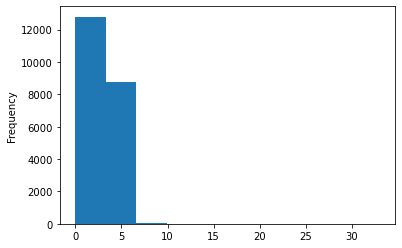

In [171]:
fd['bedrooms'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

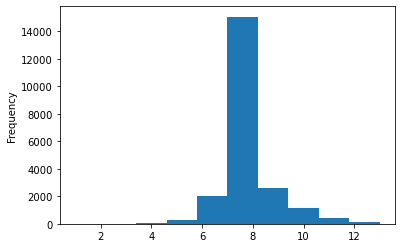

In [172]:
fd['grade'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

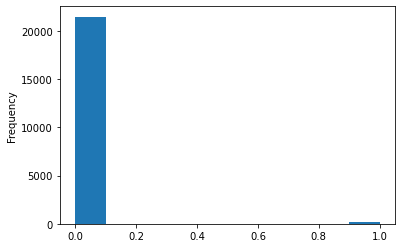

In [173]:
fd['waterfront'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

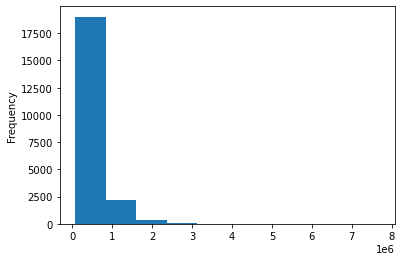

In [174]:
fd['price'].plot.hist()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bathrooms', ylabel='Density'>

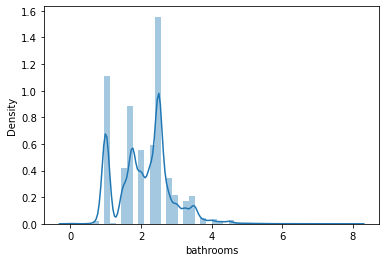

In [192]:
sns.distplot(fd['bathrooms'])

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

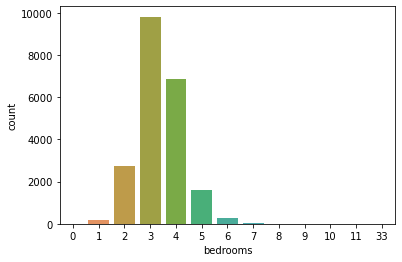

In [199]:
sns.countplot(x='bedrooms',data=fd)

<AxesSubplot:xlabel='view', ylabel='count'>

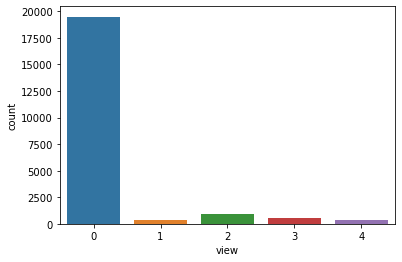

In [211]:
sns.countplot(x='view',data=fd)

<AxesSubplot:>

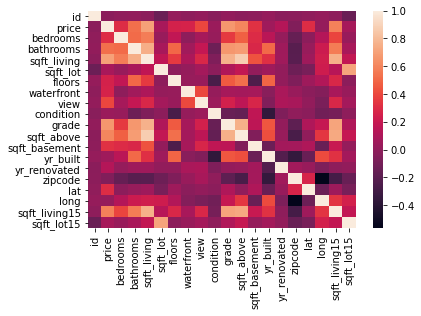

In [217]:
cor = fd.corr()
sns.heatmap(cor)

In [ ]:
g= sns.FacetGrid(fd,col='bathrooms')
g.map(plt.hist,'view')

In [177]:
x=fd["price"].values[:,np.newaxis]
y=fd["lat"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)


In [178]:
model=LinearRegression() 
model.fit(x_train,y_train)  
predicted=model.predict(x_test) 


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 0.01751726312250552
R squared 0.09995012269458659


In [179]:
LinearRegression()

LinearRegression()

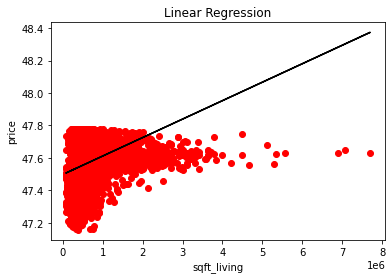

In [181]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [182]:
training_data = fd.sample(frac=0.8, random_state=25)
testing_data = fd.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 17290
No. of testing examples: 4323


In [228]:
train_test_split(fd, test_size=0.2, random_state=30, shuffle=True)

[               id             date     price  bedrooms  bathrooms  \
 13182  9828701747  20150123T000000  600000.0         3       1.00   
 14863  7760400880  20140929T000000  240000.0         4       2.50   
 11234  8651720060  20150202T000000  431000.0         3       2.25   
 19105  2207100740  20150106T000000  463000.0         3       1.00   
 12544   871000515  20141205T000000  567500.0         2       1.50   
 ...           ...              ...       ...       ...        ...   
 500    7852170140  20150510T000000  650000.0         4       2.50   
 12077  5417600200  20140728T000000  285000.0         3       1.75   
 15277  2619920170  20141001T000000  772500.0         4       2.50   
 4517   8665900336  20140717T000000  360000.0         3       2.00   
 5925   7950300670  20150218T000000  450000.0         2       1.00   
 
        sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
 13182          970      4800     1.0           0     0  ...      6   
 14863         2

In [216]:
x=fd[["price"]]
y=fd["sqft_living"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)

model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test) 

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 419107.7654673461
R squared 0.49875223400847024


In [188]:
x = [[0.44, 0.68], [0.99, 0.23]]
y = [109.85, 155.72]

lg = LinearRegression() 
poly = PolynomialFeatures(degree = 2) 

In [224]:
x= fd[["sqft_living", "sqft_lot"]]
y= fd["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) 
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  56744946960.52548
R squared:  0.5486313907730466
